# Overview

Feel free to skip to the section labeled **'Use Scenarion to interpret the model'** if you don't care about the data prep and building the model (things that don't use Scenarion)

In [1]:
import scenarion
import pandas as pd
from sklearn.ensemble import ExtraTreesClassifier

import copy

# Load and Prep the data

In [2]:
! wget https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data

--2018-11-07 14:57:43--  https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.249
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.249|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3974305 (3.8M) [text/plain]
Saving to: ‘adult.data.1’

adult.data.1        100%[===================>]   3.79M  4.51MB/s    in 0.8s    

2018-11-07 14:57:44 (4.51 MB/s) - ‘adult.data.1’ saved [3974305/3974305]



In [3]:
# Load the data
columns = ['age',
          'work_class',
          'final_weight',
          'educ',
          'educ_num',
          'marital_status',
          'occupation',
          'relationship',
          'race',
          'sex',
          'capital_gain',
          'capital_loss',
          'work_hours',
          'native_country',
          'income']

df = pd.read_csv('adult.data', names=columns)

# view a sample of the DataFrame
df.sample(4)

,age,work_class,final_weight,educ,educ_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,work_hours,native_country,income
18891,36,Federal-gov,359249,Some-college,10,Separated,Adm-clerical,Not-in-family,Black,Male,0,0,40,United-States,<=50K
15096,19,Private,162621,Some-college,10,Never-married,Tech-support,Own-child,White,Male,0,0,14,United-States,<=50K
21371,30,Private,207668,Bachelors,13,Never-married,Tech-support,Not-in-family,White,Male,0,0,60,Hungary,<=50K
17743,41,Private,806552,Some-college,10,Married-civ-spouse,Sales,Husband,White,Male,0,0,50,United-States,>50K


## Do one hot encoding on categorical variables

In [4]:
# we'll only use a few for demonstration
categorical_variables = ['work_class',
                         'educ',
                         'occupation',
                         'sex']
dummy_cols_by_var = {}

new_df = copy.copy(df)

for col in  categorical_variables:
    dummy_data = pd.get_dummies(df[col], prefix=col)
    dummy_cols_by_var[col] = list(dummy_data.columns)
    
    new_df = pd.concat([new_df, dummy_data], axis=1)
    

# Train a model

In [5]:
y_col = 'income'
x_cols = ['age','capital_gain','capital_loss','work_hours']
for var in categorical_variables:
    x_cols.extend(dummy_cols_by_var[var])

train_x = new_df[x_cols]
train_y = new_df[y_col]

model = ExtraTreesClassifier(n_estimators=100, min_samples_leaf=10)
model.fit(train_x, train_y);

# Use Scenarion to interpret the model

As seen in other examples, we can look at **continuous variables**:

Testing Scenarios: 100%|██████████| 100/100 [00:03<00:00, 25.37it/s]


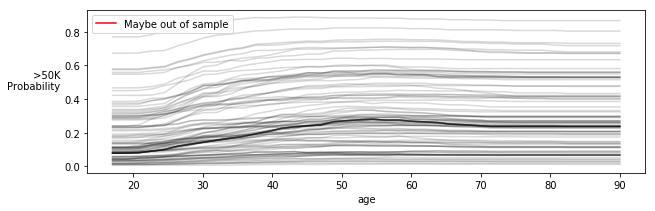

In [6]:
col_to_test = 'age'
scenarios_df = scenarion.test_scenarios(model, new_df, x_cols, 
                        feat_to_test=col_to_test, classes_to_show=[' >50K'])

But we can also use Scenarion to investigate **categorical variables**:

Testing Scenarios: 100%|██████████| 200/200 [00:07<00:00, 25.77it/s]


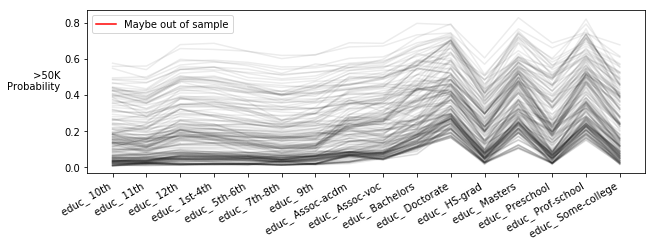

In [7]:
category_columns = dummy_cols_by_var['educ']

scenarios_df = scenarion.test_scenarios(model, new_df, 
            x_cols, category_columns, classes_to_show=[' >50K'], n_samples=200)

**Note:** You can specify the order, or a subset of categorical values, by simply passing in only a subset of the values in the order you want. See below.

Testing Scenarios: 100%|██████████| 200/200 [00:07<00:00, 26.52it/s]


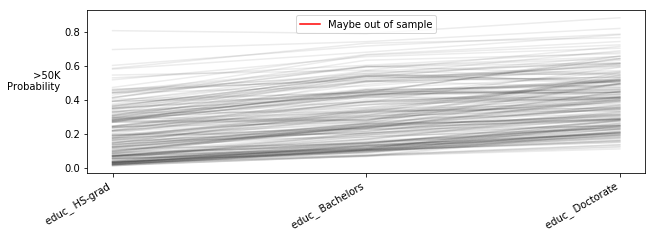

In [8]:
category_columns = ['educ_ HS-grad', 'educ_ Bachelors', 'educ_ Doctorate']
#print(category_columns)
scenarios_df = scenarion.test_scenarios(model, new_df, x_cols, category_columns, 
                                        classes_to_show=[' >50K'],n_samples=200)